<a href="https://colab.research.google.com/github/ovisaha5/DataProcessingSP22/blob/main/Exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exam1
##Avijit Saha
##Data Processing Visualization-CPSMA 4313

References:
1. From my quiz/homework page in github; https://github.com/ovisaha5/DataProcessingSP22

2. Dr. Nicholas Jacob lectures in github; https://github.com/nurfnick/Data_Viz

3. Pandas Website; https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html

4. Wikipidea Page; https://en.wikipedia.org/wiki/List_of_mountains_by_elevation

5. Stack overflow website; https://stackoverflow.com/questions/35261838/pandas-calculate-median-of-group-over-columns



“I attest that the resources above were the only ones utilized in completing
the exam and the work included is my own and no one else from the course.”



#### First, I will import the libraries

In [1]:
import numpy as np 
import pandas as pa 
from scipy import stats
import requests
from bs4 import BeautifulSoup


##**Question 1**

Getting the wikipidea page and returning only the mountain within the range of Himalays. Part **(a)** and **(b)**

In [2]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table')
df = pa.read_html(str(tables))[0] #storing the table in data frame
df.loc[df.Range=="Himalayas"].head()#Mountain only in Himalayas

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"


It gave me the mountain lists which is only in himalayas range

####Creating a Barchart by Range; Part **(c)**

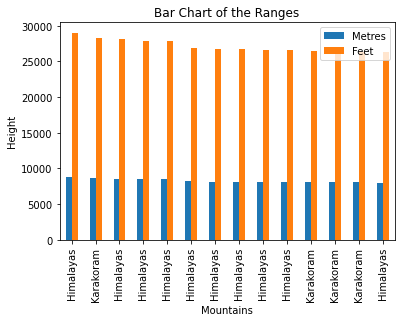

In [3]:
df.plot.bar("Range" ,title='Bar Chart of the Ranges', xlabel='Mountains', ylabel='Height')


####Creating box plot of the height in feet; Part **(d)**

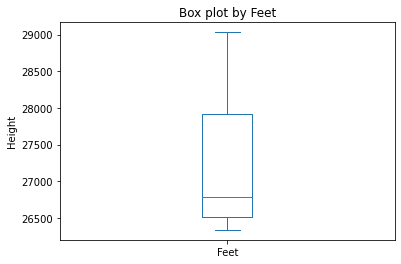

In [5]:
df.Feet.plot(kind='box', title='Box plot by Feet', ylabel='Height') #Creating a box plot by column Feet

Now,I will report the mean, standard daviation and 5 number summary for the height in feet; Part **(e)**

In [6]:
df.Feet.mean() #calculate mean

27178.214285714286

In [7]:
df.Feet.std() #calculate standard daviation

879.975452329948

In [8]:
df.Feet.describe()[3:] #five number summary

min    26335.0
25%    26518.0
50%    26788.0
75%    27914.5
max    29032.0
Name: Feet, dtype: float64

Now I will report the mean and the median of mountains when grouped by their Range. Part **(f)**

In [9]:
df.groupby('Range').mean() #Grouped by Range, Calculate mean

,Metres,Feet
Range,,
Himalayas,8319.80,27295.9
Karakoram,8194.25,26884.0


In [10]:
df.groupby('Range').median() #Grouped by Range, Calculate median

,Metres,Feet
Range,,
Himalayas,8177.5,26829.5
Karakoram,8065.5,26461.5


##**Question 2**



In [11]:
from google.colab import auth
auth.authenticate_user()  #to authenicate data in BigQuery
print('Authenticated')

Authenticated


In [12]:
%%bigquery --project smart-tracer-338719
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` #To see the table
LIMIT 5


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,None,None,None,None,8.45,0.00,0.0,0.0,8.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,None,None,None,None,6.05,2.00,0.0,0.0,8.05,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
3,29aea409062ff5c29c33fecff902acd8e58e5e0f,73f6888d8d8f9808f6624377edfa1e2a0a574b06eafbc9...,2014-07-31 09:45:00+00:00,2014-07-31 09:45:00+00:00,0,0.0,None,None,None,None,10.05,2.01,0.0,0.0,12.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
4,e83f8835694883f25c11fc70bdf8443b5c68448f,55af2e70fd4624a43fea70121974c54db44c8e7582ce3d...,2014-07-16 08:45:00+00:00,2014-07-16 08:45:00+00:00,0,0.0,None,None,None,None,3.25,0.00,0.0,1.0,4.25,Cash,Blue Ribbon Taxi Association Inc.,None,None,None,None,None,None


####Counting total rows part**(a)**

In [13]:
%%bigquery --project smart-tracer-338719
SELECT COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` #Counting the total row numbers

,total_rows
0,198792903


It gave me the total number of rows.

####Average trip total based on payment type part**(b)**

In [15]:
%%bigquery --project smart-tracer-338719
SELECT payment_type, AVG(trip_total) as avg_trip_total
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` #Average trip_total grouped by the payment_type
GROUP BY payment_type

,payment_type,avg_trip_total
0,Credit Card,20.524892
1,Prcard,20.320682
2,Prepaid,22.377662
3,No Charge,15.836177
4,Way2ride,16.639366
5,Split,18.788039
6,Dispute,15.496588
7,Pcard,10.116931
8,Unknown,17.649893
9,Mobile,20.339910


I have found the avaerage trip_total by payment_type

####Total number of non-zero recorded time, were above the average time; part**(c)**

In [16]:
%%bigquery --project smart-tracer-338719
SELECT AVG(trip_seconds) as avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` #To see the average.

,avg_time
0,792.717188


It count the average time for the trip. I can apply the result to find the numbers of non_zero recorded time were more than the average.

In [17]:
%%bigquery --project smart-tracer-338719
SELECT COUNT(*) as num_of_non_zero_more_than_avg_time_trips
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` #Count only those which are more than average_time
WHERE trip_seconds>792.717188

,num_of_non_zero_more_than_avg_time_trips
0,62143014


So, the total number of trips for non zero recorded time, were above the the average time is 62143014

##**Question 3**

a. Aproximately I worked 3-4hours for this exam.

b. Hardest topic for me in this exam was the ploting by group and easiest part for me was importing the dataset from the BigQuery and wikipidea.

c. The method of gathering data I was excited to use again was SQL from BigQuery.